# getting started with pytorch

- Data load 
- build model 
- fitting model
- making prediction and evaluating model
- saving and loading model
- putting it all together

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.1'

We'll use linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [6]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 10
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

## Train test split

In [7]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

| PyTorch Module / Function | Description |
|---------------------------|-------------|
| [`torch.nn`](https://pytorch.org/docs/stable/nn.html) | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way). |
| [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.Parameter.html) | Stores tensors that can be used with `nn.Module`. If `requires_grad=True`, gradients (used for updating model parameters via gradient descent) are calculated automatically—this is often referred to as "autograd". |
| [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html) | The base class for all neural network modules. All building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method to be implemented. |
| [`torch.optim`](https://pytorch.org/docs/stable/optim.html) | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| `def forward()` | All `nn.Module` subclasses require a `forward()` method. This defines the computation that will take place on the data passed to the particular `nn.Module` (e.g., the linear regression formula). |


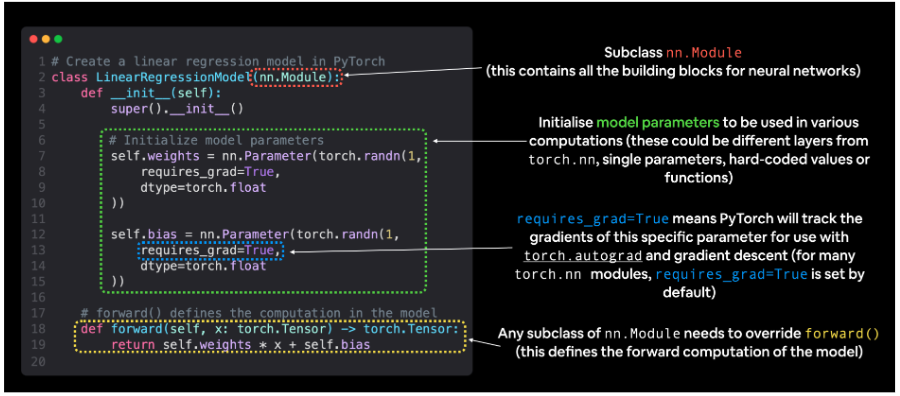

In [9]:
from torch import nn
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [10]:
reg_ = LinearRegressionModel()

In [13]:
reg_.state_dict()

OrderedDict([('weights', tensor([0.4198])), ('bias', tensor([-0.1139]))])

In [12]:
reg_.bias

Parameter containing:
tensor([-0.1139], requires_grad=True)

In [15]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = reg_(X_test)

In [18]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=reg_.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    reg_.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = reg_(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    reg_.eval()

    with torch.inference_mode(): # this is newer than no_grad and it is faster 
      # 1. Forward pass on test data
      test_pred = reg_(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 1.5320152044296265 | MAE Test Loss: 2.5644190311431885 
Epoch: 10 | MAE Train Loss: 0.134815514087677 | MAE Test Loss: 0.18788298964500427 
Epoch: 20 | MAE Train Loss: 0.11778827756643295 | MAE Test Loss: 0.1704002022743225 
Epoch: 30 | MAE Train Loss: 0.1010989174246788 | MAE Test Loss: 0.14515326917171478 
Epoch: 40 | MAE Train Loss: 0.08440746366977692 | MAE Test Loss: 0.1199059709906578 
Epoch: 50 | MAE Train Loss: 0.067977175116539 | MAE Test Loss: 0.07531679421663284 
Epoch: 60 | MAE Train Loss: 0.05455448478460312 | MAE Test Loss: 0.05871023237705231 
Epoch: 70 | MAE Train Loss: 0.1358601599931717 | MAE Test Loss: 0.04886769875884056 
Epoch: 80 | MAE Train Loss: 0.09793384373188019 | MAE Test Loss: 0.051304787397384644 
Epoch: 90 | MAE Train Loss: 0.08395280689001083 | MAE Test Loss: 0.10097234696149826 


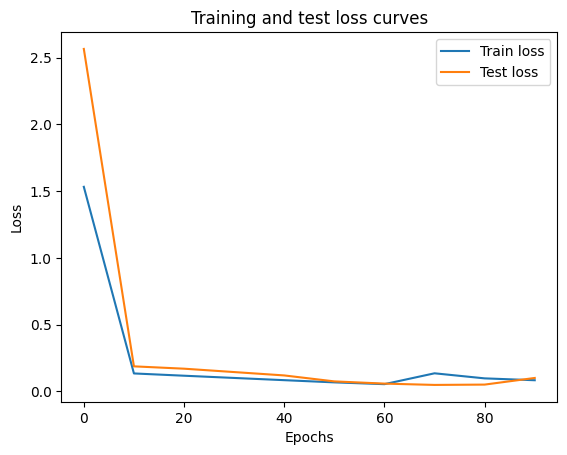

In [20]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
reg_.state_dict()

OrderedDict([('weights', tensor([0.7423])), ('bias', tensor([0.2622]))])

In [22]:
with torch.inference_mode():
    y_pred = reg_(X_test)

## Now, we can save the pytorch models using- 

- torch.save
- torch.load


The recommended way for saving and loading a model for inference (making predictions) is by saving and loading a model's state_dict().


1. We'll create a directory for saving models to called models using Python's pathlib module.
2. We'll create a file path to save the model to.
3. We'll call torch.save(obj, f) where obj is the target model's state_dict() and f is the filename of where to save the model. <br>

The disadvantage of this approach (saving the whole model) is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...

Because of this, your code can break in various ways when used in other projects or after refactors.


